# What is Standardization ?

# What is Normalization ?

# Standardization vs Normalization ?

# Feature Scaling: 
Standardization and Normalization

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
df2 = df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [16]:
df3 = df2.fillna(df2.mean())

In [17]:
df3.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [18]:
X = df3.drop("survived",axis = 1)
y = df3["survived"]

print("Shape of X = ",X.shape)
print("Shape of y = ",y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


In [22]:
X_train , X_test , y_train, y_test = train_test_split(
                                    X,y,
                                        test_size=0.2,                                       train_size=None,
                                        random_state=51,
                                        shuffle=True,
                                        stratify=None,)
print("Shape of X_train = ",X_train.shape)
print("Shape of y_train = ",y_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of y_test = ",y_test.shape)

Shape of X_train =  (712, 3)
Shape of y_train =  (712,)
Shape of X_test =  (179, 3)
Shape of y_test =  (179,)


In [24]:
sc = StandardScaler()
sc.fit((X_train))

StandardScaler()

In [25]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [26]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [27]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [31]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
X_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [34]:
#X_test_sc

In [35]:
X_train_sc = pd.DataFrame(X_train_sc, columns = ["pclass",'age','parch'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ["pclass",'age','parch'])

In [36]:
X_train_sc.head()

,pclass,age,parch
0,-1.75838,-2.307763,-1.109689
1,-1.75838,-2.121132,-1.109689
2,-1.75838,-2.384785,-1.109689
3,-1.75838,-2.343312,-1.109689
4,-1.75838,-2.273997,2.043036


In [37]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,-2.73,-2.27,-0.49
std,1.19,0.08,1.26
min,-4.57,-2.45,-1.11
25%,-3.51,-2.32,-1.11
50%,-1.76,-2.27,-1.11
75%,-1.76,-2.24,-1.11
max,-1.76,-2.03,6.77


In [38]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [39]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [40]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [41]:
X_train_mmc = pd.DataFrame(X_train_mmc, columns = ["pclass",'age','parch'])
X_test_mmc =  pd.DataFrame(X_test_mmc, columns = ["pclass",'age','parch'])

In [42]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


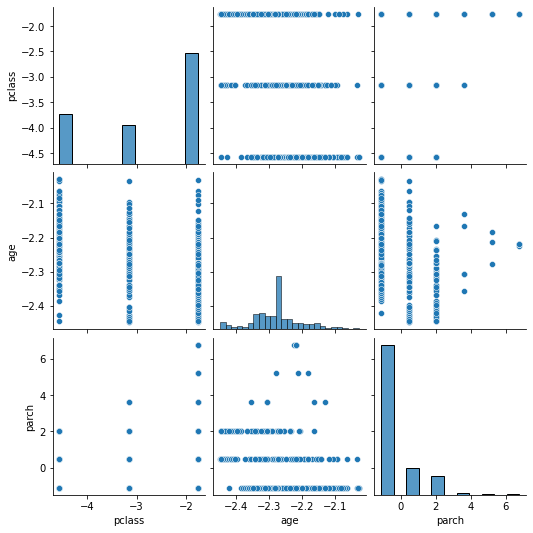

In [44]:
sns.pairplot(X_train_sc)

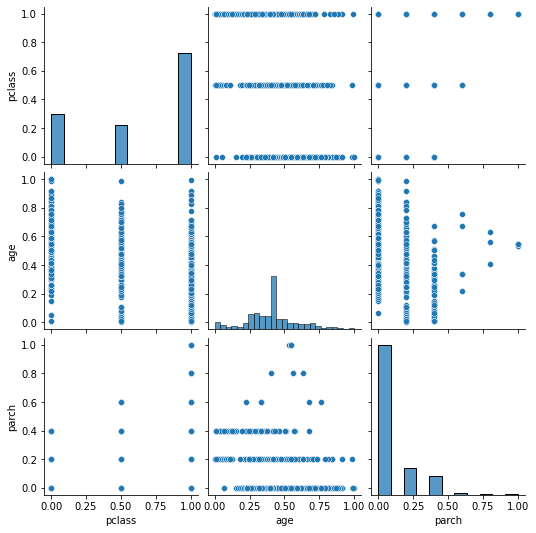

In [45]:
sns.pairplot(X_train_mmc)

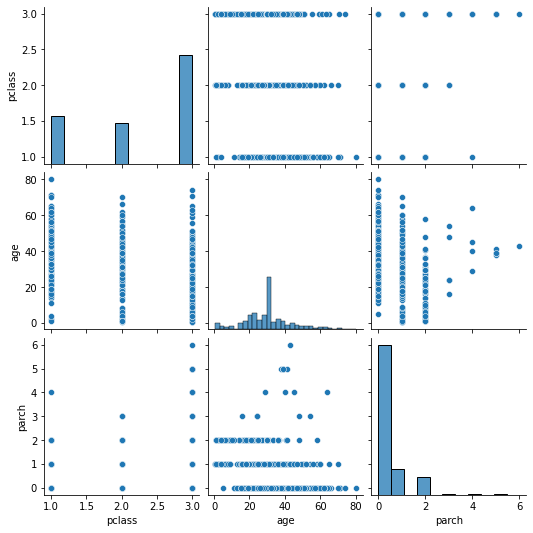

In [47]:
sns.pairplot(X)